In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import random
import sklearn.preprocessing as skp
import sklearn.decomposition as skd

%matplotlib inline

In [3]:
data = pd.read_csv('data_cleaned.csv')

In [4]:
data.head()

,Adjusted_Grade,New?,Other_Location_Code_in_LCGMS,School_Name,SED_Code,Location_Code,District,Latitude,Longitude,Address_(Full),City,Zip,Grades,Grade_Low,Grade_High,Community_School?,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Percent_Black_/_Hispanic,Percent_White,Student_Attendance_Rate,Percent_of_Students_Chronically_Absent,Rigorous_Instruction_%,Rigorous_Instruction_Rating,Collaborative_Teachers_%,Collaborative_Teachers_Rating,Supportive_Environment_%,Supportive_Environment_Rating,Effective_School_Leadership_%,Effective_School_Leadership_Rating,Strong_FamilyCommunity_Ties_%,Strong_FamilyCommunity_Ties_Rating,Trust_%,Trust_Rating,Student_Achievement_Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade_3_ELAAll_Students_Tested,Grade_3_ELA_4sAll_Students,Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_3_ELA_4sBlack_or_African_American,Grade_3_ELA_4sHispanic_or_Latino,Grade_3_ELA_4sAsian_or_Pacific_Islander,Grade_3_ELA_4sWhite,Grade_3_ELA_4sMultiracial,Grade_3_ELA_4sLimited_English_Proficient,Grade_3_ELA_4sEconomically_Disadvantaged,Grade_3_MathAll_Students_tested,Grade_3_Math_4sAll_Students,Grade_3_Math_4sAmerican_Indian_or_Alaska_Native,Grade_3_Math_4sBlack_or_African_American,Grade_3_Math_4sHispanic_or_Latino,Grade_3_Math_4sAsian_or_Pacific_Islander,Grade_3_Math_4sWhite,Grade_3_Math_4sMultiracial,Grade_3_Math_4sLimited_English_Proficient,Grade_3_Math_4sEconomically_Disadvantaged,Grade_4_ELAAll_Students_Tested,Grade_4_ELA_4sAll_Students,Grade_4_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_4_ELA_4sBlack_or_African_American,Grade_4_ELA_4sHispanic_or_Latino,Grade_4_ELA_4sAsian_or_Pacific_Islander,Grade_4_ELA_4sWhite,Grade_4_ELA_4sMultiracial,Grade_4_ELA_4sLimited_English_Proficient,Grade_4_ELA_4sEconomically_Disadvantaged,Grade_4_MathAll_Students_Tested,Grade_4_Math_4sAll_Students,Grade_4_Math_4sAmerican_Indian_or_Alaska_Native,Grade_4_Math_4sBlack_or_African_American,Grade_4_Math_4sHispanic_or_Latino,Grade_4_Math_4sAsian_or_Pacific_Islander,Grade_4_Math_4sWhite,Grade_4_Math_4sMultiracial,Grade_4_Math_4sLimited_English_Proficient,Grade_4_Math_4sEconomically_Disadvantaged,Grade_5_ELAAll_Students_Tested,Grade_5_ELA_4sAll_Students,Grade_5_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_5_ELA_4sBlack_or_African_American,Grade_5_ELA_4sHispanic_or_Latino,Grade_5_ELA_4sAsian_or_Pacific_Islander,Grade_5_ELA_4sWhite,Grade_5_ELA_4sMultiracial,Grade_5_ELA_4sLimited_English_Proficient,Grade_5_ELA_4sEconomically_Disadvantaged,Grade_5_MathAll_Students_Tested,Grade_5_Math_4sAll_Students,Grade_5_Math_4sAmerican_Indian_or_Alaska_Native,Grade_5_Math_4sBlack_or_African_American,Grade_5_Math_4sHispanic_or_Latino,Grade_5_Math_4sAsian_or_Pacific_Islander,Grade_5_Math_4sWhite,Grade_5_Math_4sMultiracial,Grade_5_Math_4sLimited_English_Proficient,Grade_5_Math_4sEconomically_Disadvantaged,Grade_6_ELAAll_Students_Tested,Grade_6_ELA_4sAll_Students,Grade_6_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_6_ELA_4sBlack_or_African_American,Grade_6_ELA_4sHispanic_or_Latino,Grade_6_ELA_4sAsian_or_Pacific_Islander,Grade_6_ELA_4sWhite,Grade_6_ELA_4sMultiracial,Grade_6_ELA_4sLimited_English_Proficient,Grade_6_ELA_4sEconomically_Disadvantaged,Grade_6_MathAll_Students_Tested,Grade_6_Math_4sAll_Students,Grade_6_Math_4sAmerican_Indian_or_Alaska_Native,Grade_6_Math_4sBlack_or_African_American,Grade_6_Math_4sHispanic_or_Latino,Grade_6_Math_4sAsian_or_Pacific_Islander,Grade_6_Math_4sWhite,Grade_6_Math_4sMultiracial,Grade_6_Math_4sLimited_English_Proficient,Grade_6_Math_4sEconomically_Disadvantaged,Grade_7_ELAAll_Students_Tested,Grade_7_ELA_4sAll_Students,Grade_7_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_7_ELA_4sBlack_or_African_American,Grade_7_ELA_4sHispanic_or_Latino,Grade_7_ELA_4sAsian_or_Pacific_Islander,Grade_7_ELA_4sWhite,Grade_7_ELA_4sMultiracial,Grade_7_ELA_4sLimited_English_Proficient,Grade_7_ELA_4sEconomically_Disadvantaged,Grade_7_MathAll_Students_Tested,Grade_7_Math_4sAll_Students,Grade_7_Math_

In [5]:
columns = data.columns[data.columns.str.contains("%") | data.columns.str.contains("Percent") | 
                       data.columns.str.contains("ELA") | data.columns.str.contains("Math") |
                       data.columns.str.contains("Economic_Need_Index") | 
                       data.columns.str.contains("School_Income_Estimate")]
columns

Index(['Economic_Need_Index', 'School_Income_Estimate', 'Percent_ELL',
       'Percent_Asian', 'Percent_Black', 'Percent_Hispanic',
       'Percent_Black_/_Hispanic', 'Percent_White',
       'Percent_of_Students_Chronically_Absent', 'Rigorous_Instruction_%',
       ...
       'Grade_8_MathAll_Students_Tested', 'Grade_8_Math_4sAll_Students',
       'Grade_8_Math_4sAmerican_Indian_or_Alaska_Native',
       'Grade_8_Math_4sBlack_or_African_American',
       'Grade_8_Math_4sHispanic_or_Latino',
       'Grade_8_Math_4sAsian_or_Pacific_Islander', 'Grade_8_Math_4sWhite',
       'Grade_8_Math_4sMultiracial',
       'Grade_8_Math_4sLimited_English_Proficient',
       'Grade_8_Math_4sEconomically_Disadvantaged'],
      dtype='object', length=137)

In [6]:
working_data = data[columns]
working_data.head()

,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Percent_Black_/_Hispanic,Percent_White,Percent_of_Students_Chronically_Absent,Rigorous_Instruction_%,Collaborative_Teachers_%,Supportive_Environment_%,Effective_School_Leadership_%,Strong_FamilyCommunity_Ties_%,Trust_%,Average_ELA_Proficiency,Average_Math_Proficiency,Grade_3_ELAAll_Students_Tested,Grade_3_ELA_4sAll_Students,Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_3_ELA_4sBlack_or_African_American,Grade_3_ELA_4sHispanic_or_Latino,Grade_3_ELA_4sAsian_or_Pacific_Islander,Grade_3_ELA_4sWhite,Grade_3_ELA_4sMultiracial,Grade_3_ELA_4sLimited_English_Proficient,Grade_3_ELA_4sEconomically_Disadvantaged,Grade_3_MathAll_Students_tested,Grade_3_Math_4sAll_Students,Grade_3_Math_4sAmerican_Indian_or_Alaska_Native,Grade_3_Math_4sBlack_or_African_American,Grade_3_Math_4sHispanic_or_Latino,Grade_3_Math_4sAsian_or_Pacific_Islander,Grade_3_Math_4sWhite,Grade_3_Math_4sMultiracial,Grade_3_Math_4sLimited_English_Proficient,Grade_3_Math_4sEconomically_Disadvantaged,Grade_4_ELAAll_Students_Tested,Grade_4_ELA_4sAll_Students,Grade_4_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_4_ELA_4sBlack_or_African_American,Grade_4_ELA_4sHispanic_or_Latino,Grade_4_ELA_4sAsian_or_Pacific_Islander,Grade_4_ELA_4sWhite,Grade_4_ELA_4sMultiracial,Grade_4_ELA_4sLimited_English_Proficient,Grade_4_ELA_4sEconomically_Disadvantaged,Grade_4_MathAll_Students_Tested,Grade_4_Math_4sAll_Students,Grade_4_Math_4sAmerican_Indian_or_Alaska_Native,Grade_4_Math_4sBlack_or_African_American,Grade_4_Math_4sHispanic_or_Latino,Grade_4_Math_4sAsian_or_Pacific_Islander,Grade_4_Math_4sWhite,Grade_4_Math_4sMultiracial,Grade_4_Math_4sLimited_English_Proficient,Grade_4_Math_4sEconomically_Disadvantaged,Grade_5_ELAAll_Students_Tested,Grade_5_ELA_4sAll_Students,Grade_5_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_5_ELA_4sBlack_or_African_American,Grade_5_ELA_4sHispanic_or_Latino,Grade_5_ELA_4sAsian_or_Pacific_Islander,Grade_5_ELA_4sWhite,Grade_5_ELA_4sMultiracial,Grade_5_ELA_4sLimited_English_Proficient,Grade_5_ELA_4sEconomically_Disadvantaged,Grade_5_MathAll_Students_Tested,Grade_5_Math_4sAll_Students,Grade_5_Math_4sAmerican_Indian_or_Alaska_Native,Grade_5_Math_4sBlack_or_African_American,Grade_5_Math_4sHispanic_or_Latino,Grade_5_Math_4sAsian_or_Pacific_Islander,Grade_5_Math_4sWhite,Grade_5_Math_4sMultiracial,Grade_5_Math_4sLimited_English_Proficient,Grade_5_Math_4sEconomically_Disadvantaged,Grade_6_ELAAll_Students_Tested,Grade_6_ELA_4sAll_Students,Grade_6_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_6_ELA_4sBlack_or_African_American,Grade_6_ELA_4sHispanic_or_Latino,Grade_6_ELA_4sAsian_or_Pacific_Islander,Grade_6_ELA_4sWhite,Grade_6_ELA_4sMultiracial,Grade_6_ELA_4sLimited_English_Proficient,Grade_6_ELA_4sEconomically_Disadvantaged,Grade_6_MathAll_Students_Tested,Grade_6_Math_4sAll_Students,Grade_6_Math_4sAmerican_Indian_or_Alaska_Native,Grade_6_Math_4sBlack_or_African_American,Grade_6_Math_4sHispanic_or_Latino,Grade_6_Math_4sAsian_or_Pacific_Islander,Grade_6_Math_4sWhite,Grade_6_Math_4sMultiracial,Grade_6_Math_4sLimited_English_Proficient,Grade_6_Math_4sEconomically_Disadvantaged,Grade_7_ELAAll_Students_Tested,Grade_7_ELA_4sAll_Students,Grade_7_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_7_ELA_4sBlack_or_African_American,Grade_7_ELA_4sHispanic_or_Latino,Grade_7_ELA_4sAsian_or_Pacific_Islander,Grade_7_ELA_4sWhite,Grade_7_ELA_4sMultiracial,Grade_7_ELA_4sLimited_English_Proficient,Grade_7_ELA_4sEconomically_Disadvantaged,Grade_7_MathAll_Students_Tested,Grade_7_Math_4sAll_Students,Grade_7_Math_4sAmerican_Indian_or_Alaska_Native,Grade_7_Math_4sBlack_or_African_American,Grade_7_Math_4sHispanic_or_Latino,Grade_7_Math_4sAsian_or_Pacific_Islander,Grade_7_Math_4sWhite,Grade_7_Math_4sMultiracial,Grade_7_Math_4sLimited_English_Proficient,Grade_7_Math_4sEconomically_Disadvantaged,Grade_8_ELAAll_Students_Tested,Grade_8_ELA_4sAll_Students,Grade_8_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_8_ELA_4sBl

In [7]:
working_data.shape

(1272, 137)

In [8]:
### Find missing value
working_data.isna().apply(np.sum, axis=0)

Economic_Need_Index                                 25
School_Income_Estimate                             396
Percent_ELL                                          0
Percent_Asian                                        0
Percent_Black                                        0
Percent_Hispanic                                     0
Percent_Black_/_Hispanic                             0
Percent_White                                        0
Percent_of_Students_Chronically_Absent              25
Rigorous_Instruction_%                              25
Collaborative_Teachers_%                            25
Supportive_Environment_%                            25
Effective_School_Leadership_%                       25
Strong_FamilyCommunity_Ties_%                       25
Trust_%                                             25
Average_ELA_Proficiency                             55
Average_Math_Proficiency                            55
Grade_3_ELAAll_Students_Tested                       0
Grade_3_EL

In [9]:
working_data = working_data.dropna()
working_data.shape

(828, 137)

In [10]:
working_data.head()

,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Percent_Black_/_Hispanic,Percent_White,Percent_of_Students_Chronically_Absent,Rigorous_Instruction_%,Collaborative_Teachers_%,Supportive_Environment_%,Effective_School_Leadership_%,Strong_FamilyCommunity_Ties_%,Trust_%,Average_ELA_Proficiency,Average_Math_Proficiency,Grade_3_ELAAll_Students_Tested,Grade_3_ELA_4sAll_Students,Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_3_ELA_4sBlack_or_African_American,Grade_3_ELA_4sHispanic_or_Latino,Grade_3_ELA_4sAsian_or_Pacific_Islander,Grade_3_ELA_4sWhite,Grade_3_ELA_4sMultiracial,Grade_3_ELA_4sLimited_English_Proficient,Grade_3_ELA_4sEconomically_Disadvantaged,Grade_3_MathAll_Students_tested,Grade_3_Math_4sAll_Students,Grade_3_Math_4sAmerican_Indian_or_Alaska_Native,Grade_3_Math_4sBlack_or_African_American,Grade_3_Math_4sHispanic_or_Latino,Grade_3_Math_4sAsian_or_Pacific_Islander,Grade_3_Math_4sWhite,Grade_3_Math_4sMultiracial,Grade_3_Math_4sLimited_English_Proficient,Grade_3_Math_4sEconomically_Disadvantaged,Grade_4_ELAAll_Students_Tested,Grade_4_ELA_4sAll_Students,Grade_4_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_4_ELA_4sBlack_or_African_American,Grade_4_ELA_4sHispanic_or_Latino,Grade_4_ELA_4sAsian_or_Pacific_Islander,Grade_4_ELA_4sWhite,Grade_4_ELA_4sMultiracial,Grade_4_ELA_4sLimited_English_Proficient,Grade_4_ELA_4sEconomically_Disadvantaged,Grade_4_MathAll_Students_Tested,Grade_4_Math_4sAll_Students,Grade_4_Math_4sAmerican_Indian_or_Alaska_Native,Grade_4_Math_4sBlack_or_African_American,Grade_4_Math_4sHispanic_or_Latino,Grade_4_Math_4sAsian_or_Pacific_Islander,Grade_4_Math_4sWhite,Grade_4_Math_4sMultiracial,Grade_4_Math_4sLimited_English_Proficient,Grade_4_Math_4sEconomically_Disadvantaged,Grade_5_ELAAll_Students_Tested,Grade_5_ELA_4sAll_Students,Grade_5_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_5_ELA_4sBlack_or_African_American,Grade_5_ELA_4sHispanic_or_Latino,Grade_5_ELA_4sAsian_or_Pacific_Islander,Grade_5_ELA_4sWhite,Grade_5_ELA_4sMultiracial,Grade_5_ELA_4sLimited_English_Proficient,Grade_5_ELA_4sEconomically_Disadvantaged,Grade_5_MathAll_Students_Tested,Grade_5_Math_4sAll_Students,Grade_5_Math_4sAmerican_Indian_or_Alaska_Native,Grade_5_Math_4sBlack_or_African_American,Grade_5_Math_4sHispanic_or_Latino,Grade_5_Math_4sAsian_or_Pacific_Islander,Grade_5_Math_4sWhite,Grade_5_Math_4sMultiracial,Grade_5_Math_4sLimited_English_Proficient,Grade_5_Math_4sEconomically_Disadvantaged,Grade_6_ELAAll_Students_Tested,Grade_6_ELA_4sAll_Students,Grade_6_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_6_ELA_4sBlack_or_African_American,Grade_6_ELA_4sHispanic_or_Latino,Grade_6_ELA_4sAsian_or_Pacific_Islander,Grade_6_ELA_4sWhite,Grade_6_ELA_4sMultiracial,Grade_6_ELA_4sLimited_English_Proficient,Grade_6_ELA_4sEconomically_Disadvantaged,Grade_6_MathAll_Students_Tested,Grade_6_Math_4sAll_Students,Grade_6_Math_4sAmerican_Indian_or_Alaska_Native,Grade_6_Math_4sBlack_or_African_American,Grade_6_Math_4sHispanic_or_Latino,Grade_6_Math_4sAsian_or_Pacific_Islander,Grade_6_Math_4sWhite,Grade_6_Math_4sMultiracial,Grade_6_Math_4sLimited_English_Proficient,Grade_6_Math_4sEconomically_Disadvantaged,Grade_7_ELAAll_Students_Tested,Grade_7_ELA_4sAll_Students,Grade_7_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_7_ELA_4sBlack_or_African_American,Grade_7_ELA_4sHispanic_or_Latino,Grade_7_ELA_4sAsian_or_Pacific_Islander,Grade_7_ELA_4sWhite,Grade_7_ELA_4sMultiracial,Grade_7_ELA_4sLimited_English_Proficient,Grade_7_ELA_4sEconomically_Disadvantaged,Grade_7_MathAll_Students_Tested,Grade_7_Math_4sAll_Students,Grade_7_Math_4sAmerican_Indian_or_Alaska_Native,Grade_7_Math_4sBlack_or_African_American,Grade_7_Math_4sHispanic_or_Latino,Grade_7_Math_4sAsian_or_Pacific_Islander,Grade_7_Math_4sWhite,Grade_7_Math_4sMultiracial,Grade_7_Math_4sLimited_English_Proficient,Grade_7_Math_4sEconomically_Disadvantaged,Grade_8_ELAAll_Students_Tested,Grade_8_ELA_4sAll_Students,Grade_8_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_8_ELA_4sBl

In [11]:
### Standardization
working_data_scaled = skp.scale(working_data)

C:\Users\Yunbin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


### PCA

In [12]:
pca_model = skd.PCA().fit(working_data_scaled)

In [13]:
X = pca_model.transform(working_data_scaled)

In [14]:
percentage_explained = pca_model.explained_variance_ / np.sum(pca_model.explained_variance_) * 100

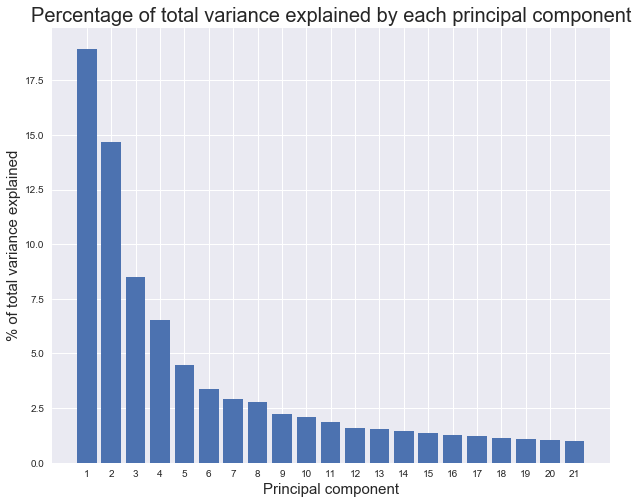

In [14]:
plt.style.use("seaborn")
plt.figure(figsize=(10,8))
plt.bar(np.arange(1, 22), percentage_explained[:21])
plt.xlabel('Principal component', size=15)
plt.ylabel('% of total variance explained', size=15)
plt.title("Percentage of total variance explained by each principal component", size=20)
plt.xticks(np.arange(1,22))
plt.show()

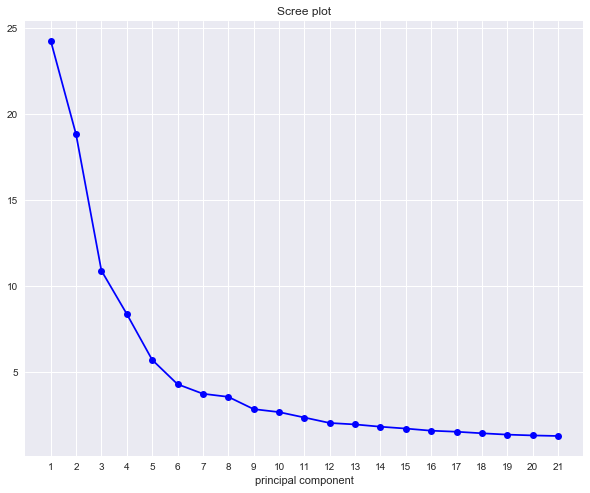

In [15]:
plt.style.use("seaborn")
plt.figure(figsize=(10,8))
plt.plot(range(1,22),pca_model.explained_variance_[:21],'b-o')
plt.xlabel('principal component')
plt.title("Scree plot")
plt.xticks(range(1, 22))
plt.show()


### K-means

In [15]:
pca_transformed_data = X[:, :5]

In [16]:
pca_transformed_data.shape

(828, 5)

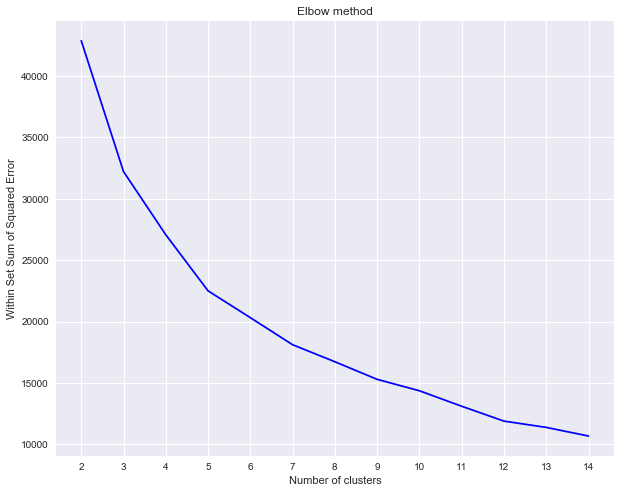

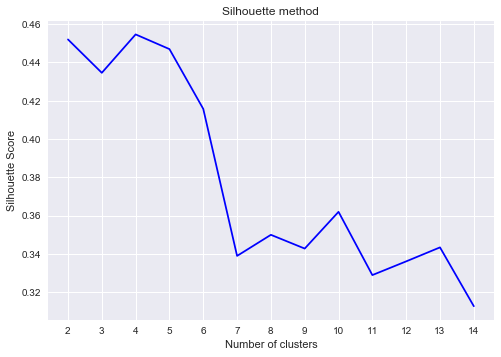

In [84]:
from sklearn import metrics
sumofsquares = []
silhouette_score = []
k = range(2, 15)

for i in k:
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10, random_state = 10)
    kmeans.fit(pca_transformed_data)
    sumofsquares.append(kmeans.inertia_)
    silhouette_score.append(metrics.silhouette_score(pca_transformed_data, kmeans.fit(pca_transformed_data).labels_))
     
plt.style.use("seaborn")
plt.figure(figsize=(10,8))
plt.plot(k, sumofsquares, 'bx-')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel('Within Set Sum of Squared Error')
plt.xticks(k)
plt.show()

plt.plot(k, silhouette_score, 'bx-')
plt.title('Silhouette method')
plt.xlabel("Number of clusters")
plt.ylabel('Silhouette Score')
plt.xticks(k)
plt.show()

In [17]:
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10, random_state = 13)
kmeans.fit(pca_transformed_data)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       3, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [18]:
working_data['cluster'] = kmeans.labels_

In [20]:
working_data.groupby("cluster")['Economic_Need_Index'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,571.0,0.746070,0.169687,0.049,0.6545,0.801,0.87500,0.957
1,193.0,0.457653,0.226987,0.059,0.2610,0.474,0.63600,0.919
2,28.0,0.658750,0.134077,0.302,0.5970,0.702,0.74625,0.825
3,36.0,0.474611,0.190604,0.114,0.3445,0.477,0.65200,0.798


In [21]:
working_data.groupby("cluster")['Average_ELA_Proficiency'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,571.0,2.398056,0.256814,1.97,2.2100,2.350,2.5300,3.73
1,193.0,2.905130,0.275481,2.16,2.7200,2.870,3.0900,3.73
2,28.0,2.885357,0.255350,2.51,2.6275,2.905,3.0800,3.30
3,36.0,2.948611,0.356292,2.35,2.7100,2.880,3.0875,3.93


In [22]:
working_data.groupby("cluster")['Average_Math_Proficiency'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,571.0,2.526427,0.321784,1.90,2.300,2.460,2.7200,3.99
1,193.0,3.208083,0.308982,2.42,2.980,3.210,3.4100,4.20
2,28.0,3.322857,0.441335,2.56,2.930,3.225,3.7075,4.16
3,36.0,3.167500,0.374046,2.42,2.905,3.090,3.3225,4.15


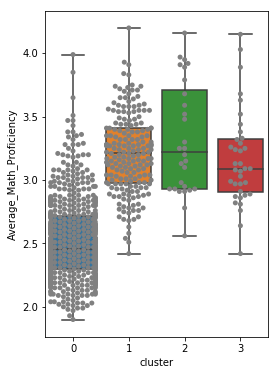

In [44]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(x='cluster', y='Average_Math_Proficiency', data=working_data, whis=np.inf)
ax = sns.swarmplot(x='cluster', y='Average_Math_Proficiency', data=working_data, color='grey')

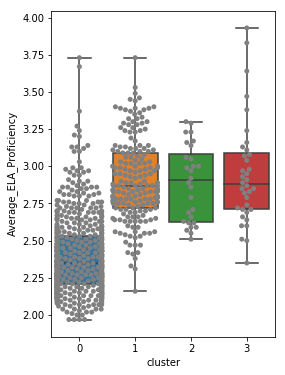

In [40]:
plt.figure(figsize=(4,6))
ax = sns.boxplot(x='cluster', y='Average_ELA_Proficiency', data=working_data, whis=np.inf)
ax = sns.swarmplot(x='cluster', y='Average_ELA_Proficiency', data=working_data, color='grey')

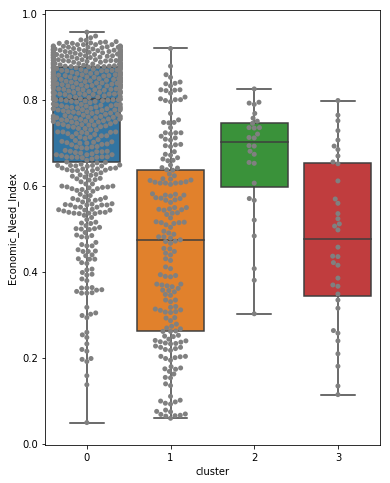

In [41]:
plt.figure(figsize=(6,8))
ax = sns.boxplot(x='cluster', y='Economic_Need_Index', data=working_data, whis=np.inf)
ax = sns.swarmplot(x='cluster', y='Economic_Need_Index', data=working_data, color='grey')

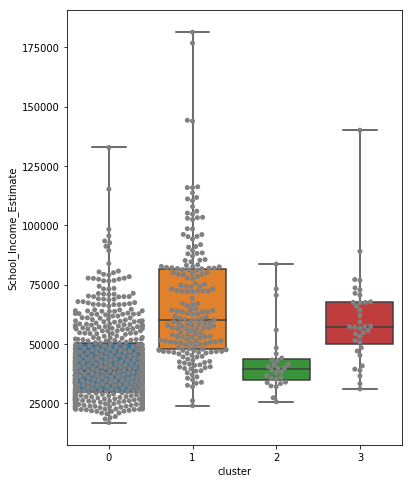

In [42]:
plt.figure(figsize=(6,8))
ax = sns.boxplot(x='cluster', y='School_Income_Estimate', data=working_data, whis=np.inf)
ax = sns.swarmplot(x='cluster', y='School_Income_Estimate', data=working_data, color='grey')

Text(0, 0.5, 'Percent of Black or Hispanic')

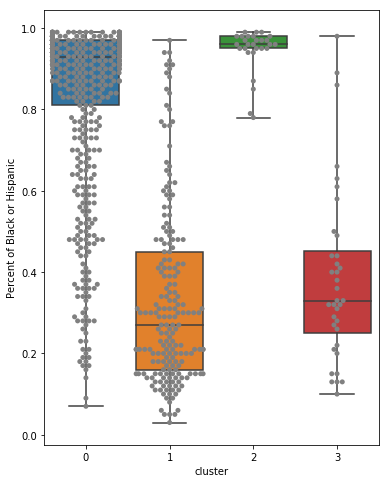

In [43]:
plt.figure(figsize=(6,8))
ax = sns.boxplot(x='cluster', y='Percent_Black_/_Hispanic', data=working_data, whis=np.inf)
ax = sns.swarmplot(x='cluster', y='Percent_Black_/_Hispanic', data=working_data, color='grey')
plt.ylabel("Percent of Black or Hispanic")

Text(0.5, 1.0, 'Distribution of Average Math Proficiency')

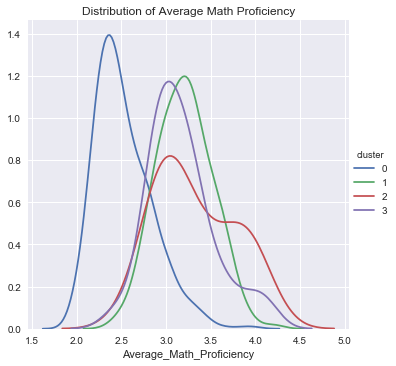

In [24]:
g = sns.FacetGrid(working_data, hue='cluster', height=5)
g.map(sns.distplot, "Average_Math_Proficiency", hist=False)
g.add_legend()
plt.title("Distribution of Average Math Proficiency")

Text(0.5, 1.0, 'Distribution of Average ELA Proficiency')

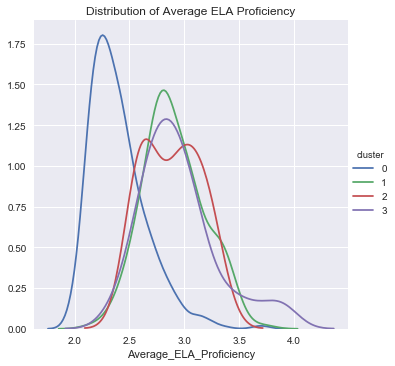

In [33]:
g = sns.FacetGrid(working_data, hue='cluster', height=5)
g.map(sns.distplot, "Average_ELA_Proficiency", hist=False)
g.add_legend()
plt.title("Distribution of Average ELA Proficiency")

C:\Users\Yunbin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


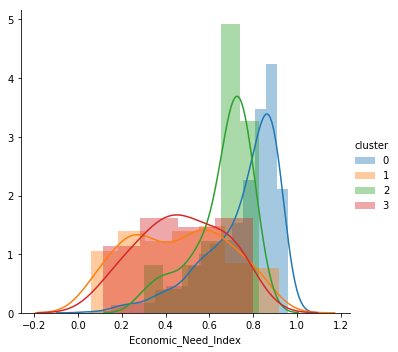

In [26]:
g = sns.FacetGrid(working_data, hue='cluster', height=5)
g.map(sns.distplot, "Economic_Need_Index", hist=True)
g.add_legend()

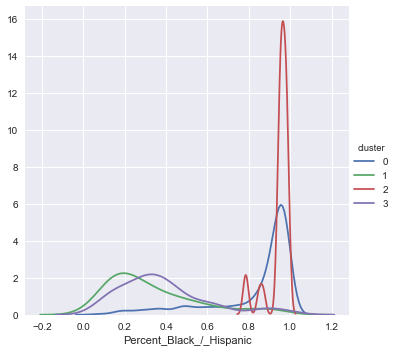

In [32]:
g = sns.FacetGrid(working_data, hue='cluster', height=5)
g.map(sns.distplot, "Percent_Black_/_Hispanic", hist=False)
g.add_legend()